In [6]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def q(x, t):
    output  = 85 * exp(-2*((x- 0.8*t)**2/(0.25**2)))
    return output

In [7]:
for i in range(10):
    for j in range(3):
        print(f"q({i+1}, {j+1}) = {q(i+1, j+1)}")

q(1, 1) = 23.633170538521515
q(1, 2) = 0.0008440078659973389
q(1, 3) = 4.9030804670605275e-26
q(2, 1) = 8.262837267255663e-19
q(2, 2) = 0.5079619460755065
q(2, 3) = 0.5079619460755006
q(3, 1) = 4.6332909043742435e-66
q(3, 2) = 4.9030804670607364e-26
q(3, 3) = 0.0008440078659973524
q(4, 1) = 4.16680422314785e-141
q(4, 2) = 7.590318874836245e-79
q(4, 3) = 2.249132122084575e-34
q(5, 1) = 6.009935083277477e-244
q(5, 2) = 1.8845348801913862e-159
q(5, 3) = 9.61250548013459e-93
q(6, 1) = 0.0
q(6, 2) = 7.504149835293707e-268
q(6, 3) = 6.588876855988455e-179
q(7, 1) = 0.0
q(7, 2) = 0.0
q(7, 3) = 7.243347806582295e-293
q(8, 1) = 0.0
q(8, 2) = 0.0
q(8, 3) = 0.0
q(9, 1) = 0.0
q(9, 2) = 0.0
q(9, 3) = 0.0
q(10, 1) = 0.0
q(10, 2) = 0.0
q(10, 3) = 0.0


In [7]:
computational_cost = {
    "explicit": {
        "mesh_size": [15251, 120801, 15016001],
        "results": [0.009030, 0.015034, 0.604595],
    },
    "implicit": {
        "mesh_size": [15251, 120801, 15016001],
        "results": [0.005764, 0.066671, 12.547629]
    }
}

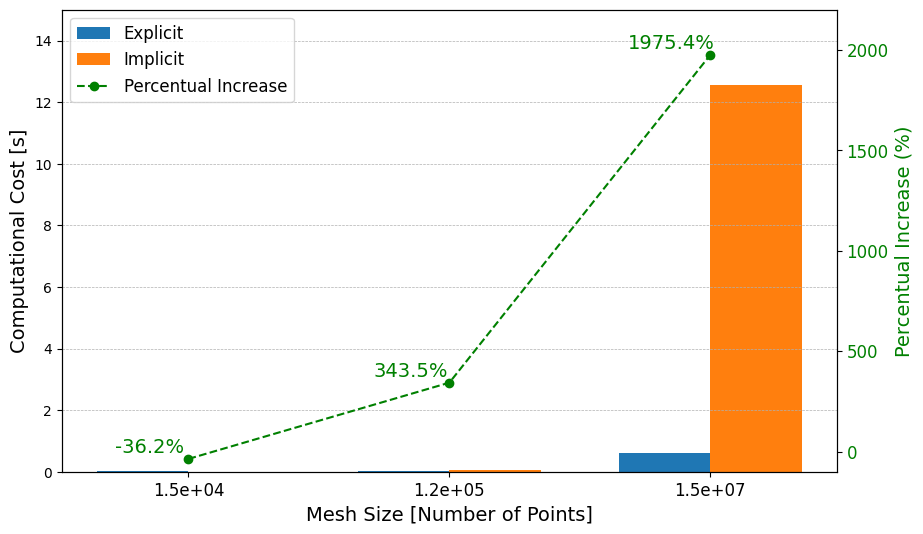

In [29]:
# Convert mesh sizes to scientific notation for x-axis labels
mesh_sizes = computational_cost["explicit"]["mesh_size"]
labels = [f"{size:.1e}" for size in mesh_sizes]

# Results
explicit_results = np.array(computational_cost["explicit"]["results"])
implicit_results = np.array(computational_cost["implicit"]["results"])

# Calculate percentual increase
percent_increase = ((implicit_results - explicit_results) / explicit_results) * 100

# Set up bar positions
x = np.arange(len(mesh_sizes))
width = 0.35

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for explicit and implicit results
ax1.bar(x - width/2, explicit_results, width, label='Explicit')
ax1.bar(x + width/2, implicit_results, width, label='Implicit')
ax1.set_xlabel('Mesh Size [Number of Points]', fontsize=14)
ax1.set_ylabel('Computational Cost [s]', fontsize=14)
ax1.set_ylim(0, 15)
#ax1.set_title('Computational Cost Comparison: Explicit vs Implicit', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=12)
ax1.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Secondary axis for percentual increase
ax2 = ax1.twinx()
ax2.set_ylim(-100, 2200)
line = ax2.plot(x, percent_increase, color='green', marker='o', linestyle='--', label='Percentual Increase')
ax2.set_ylabel('Percentual Increase (%)', color='green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green', labelsize=12)

# Annotate the percentual increase points
for i, pct in enumerate(percent_increase):
    ax2.text(x[i]-0.15, pct + 10, f"{pct:.1f}%", ha='center', va='bottom', fontsize=14, color='green')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = [line[0]], [line[0].get_label()]
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=12)

#plt.tight_layout()
plt.show()


In [3]:
L = 10
T=3
nx = 101*10

ro = 10**(-6)
c = 1.5 * 10**6
k = 0.25
ux = 0.8

dx = L/(nx-1)
lim = (ro*c*dx**2)/(2*k)
nt = (T + lim)/lim

print(nt)

10181.81
